In [238]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

from kachmarz import kaczmarz_alg
from utils import generate_train_set, get_squared_error, get_x

In [268]:
def mnk_alg(x, y, alfa=1.):
    """
    mnk_alg make a step of kaczmaz algorithm for updating weights(w) of linear model: y = x.T * w
    num of iteration of mnk algorithm equals to the size of thaining set

    :param x: numpy array of shape (sample_size, ...), where sample size is
        num of examples in training set
    :param y: numpy array of shape (sample_size, 1)
    :param gamma: multiplier for slower of quicker convergence
    :return: yield updated weights
    """
    if not isinstance(x, np.ndarray) or not isinstance(y, np.ndarray):
        raise TypeError
    assert (x.shape[0] == y.shape[0])

    # Выбираем первое приближение для оценки вектора весов w
    w = np.zeros(x.shape[1])
    for x_sample, y_sample in zip(x, y):
        #print(x_sample, y_sample)
        x_sample = np.transpose(np.matrix(x_sample))
        y_sample = np.matrix(y_sample)
        
        K = np.linalg.inv(alfa*np.eye(x_sample.shape[0]) + np.dot(x_sample, np.transpose(x_sample)))
        
        A = (y_sample - np.dot(np.matrix(w), x_sample))
        w = np.transpose(np.matrix(w)) + np.dot(K, np.matrix(x_sample))*A
        w = np.array(np.transpose(w))
        
        yield w


# Общие настройки
Задаем размеры обучающей выборки, кол-во фичей

In [269]:
sample_size = 200  # размер выборки
num_of_features = 4 # кол-во признаков - кол-во столбцов в матр. x и размер вектора w

w = np.array([0.1, 0.2, 0.3, 0.4]) # это будет истинным значением памяти модели y = x * w
                                   # x - array of shape (sample_size, num_of_features)
                                   # w - array of shape (num_of_features, 1)

0.2

## MNK

y_with_no_error = 5.937313813741194; error = [-0.]
y_with_no_error = -0.843322785025713; error = [-0.]
y_with_no_error = -6.761849445680886; error = [0.]
y_with_no_error = 1.9501819484320901; error = [-0.]
y_with_no_error = 2.885128135291186; error = [0.]
y_with_no_error = -3.7963886466341443; error = [-0.]
y_with_no_error = -5.005028868242484; error = [-0.]
y_with_no_error = -4.864188271633214; error = [-0.]
y_with_no_error = 8.814381012611783e-05; error = [0.]
y_with_no_error = 0.2854161802984055; error = [-0.]
y_with_no_error = -4.195665704913223; error = [0.]
y_with_no_error = 3.1752778361914604; error = [0.]
y_with_no_error = -0.2591005499545335; error = [-0.]
y_with_no_error = -5.5580450100818934; error = [0.]
y_with_no_error = 2.2505617411790038; error = [0.]
y_with_no_error = 1.1103445047698222; error = [0.]
y_with_no_error = 2.853691081415376; error = [0.]
y_with_no_error = -2.236537044215527; error = [-0.]
y_with_no_error = -2.0114496693369417; error = [-0.]
y_with_no_error =

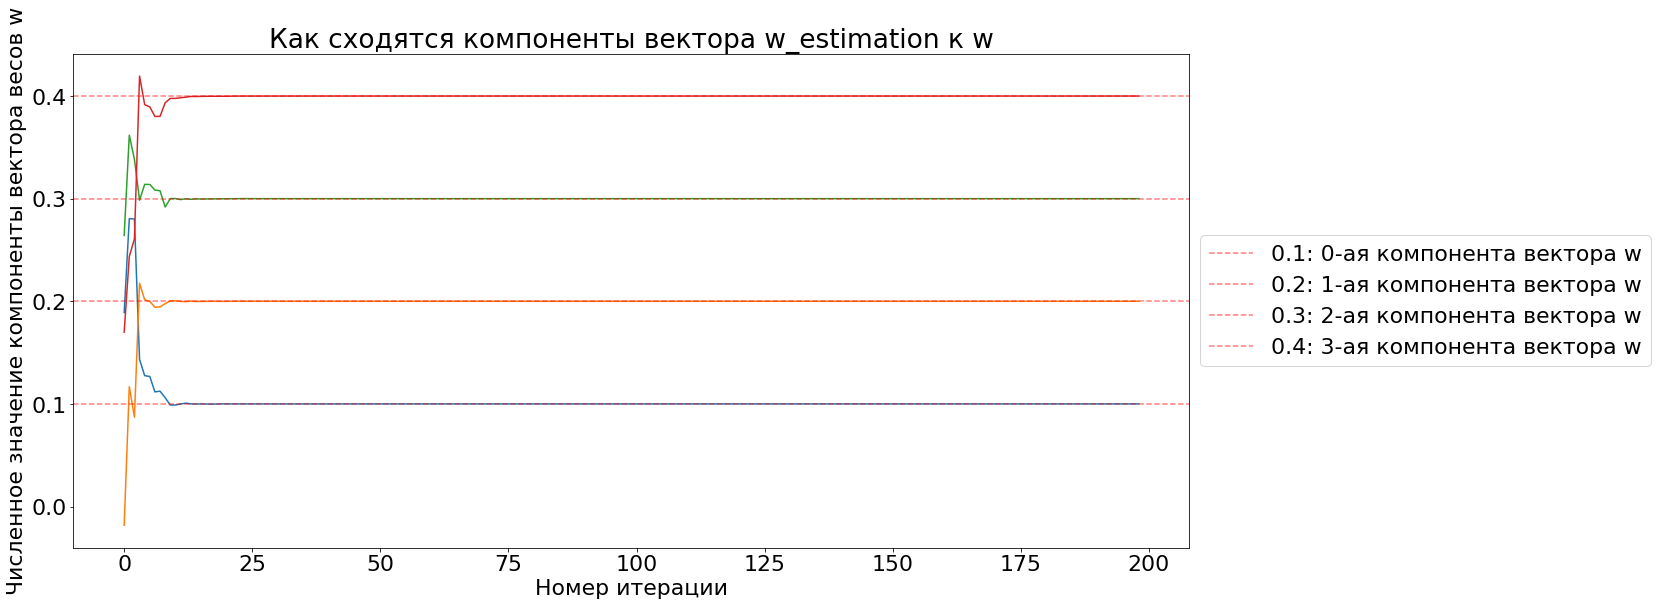

# Без шума
находим веса w для линейной модели y = x * w

In [3]:
sigma = 0 # дисперсия ошибки(она накладывается на y)

## Kaczmarz

In [4]:
x, y = generate_train_set(w, sigma, sample_size, num_of_features)  

gen = kaczmarz_alg(x, y, gamma=0.6)
print(x.shape, y.shape)
w_estiomation_prev_step = next(gen)


squared_error_prev_step = get_squared_error(w_estiomation_prev_step, w)
errors = squared_error_prev_step
weights = np.array([])

for iteration_num, w_estimation in enumerate(gen):
    print(iteration_num)
    squared_error_current_step = get_squared_error(w_estimation, w)

    w_estimation = w_estimation.reshape((-1,1))
    print(w_estimation, w_estimation.shape, weights.shape)
    if weights.size == 0:
        weights = w_estimation
    else:
        weights = np.hstack((weights, w_estimation))
    errors = np.append(errors, squared_error_current_step)

y_with_no_error = 3.0230192184239177; error = [-0.]
y_with_no_error = -6.01337029201917; error = [0.]
y_with_no_error = -1.5119470136634783; error = [0.]
y_with_no_error = -0.41441733826033844; error = [0.]
y_with_no_error = 1.7267977479508883; error = [-0.]
y_with_no_error = 2.7618854369693104; error = [-0.]
y_with_no_error = 0.9172383815385068; error = [0.]
y_with_no_error = 3.775411693249681; error = [-0.]
y_with_no_error = -1.2365262249257456; error = [-0.]
y_with_no_error = -2.181983274033326; error = [0.]
y_with_no_error = -3.780854931682975; error = [-0.]
y_with_no_error = 0.3297789228060448; error = [0.]
y_with_no_error = -1.6539824235131673; error = [0.]
y_with_no_error = -0.9762916426535126; error = [0.]
y_with_no_error = -2.5914203384853653; error = [-0.]
y_with_no_error = -3.842270226199593; error = [-0.]
y_with_no_error = -0.22435645208539357; error = [0.]
y_with_no_error = -3.67655903438176; error = [0.]
y_with_no_error = -2.8789284685053698; error = [-0.]
y_with_no_error

## Графики изменения квадратичной ошибки весов и сходимости компонентов вектора весов

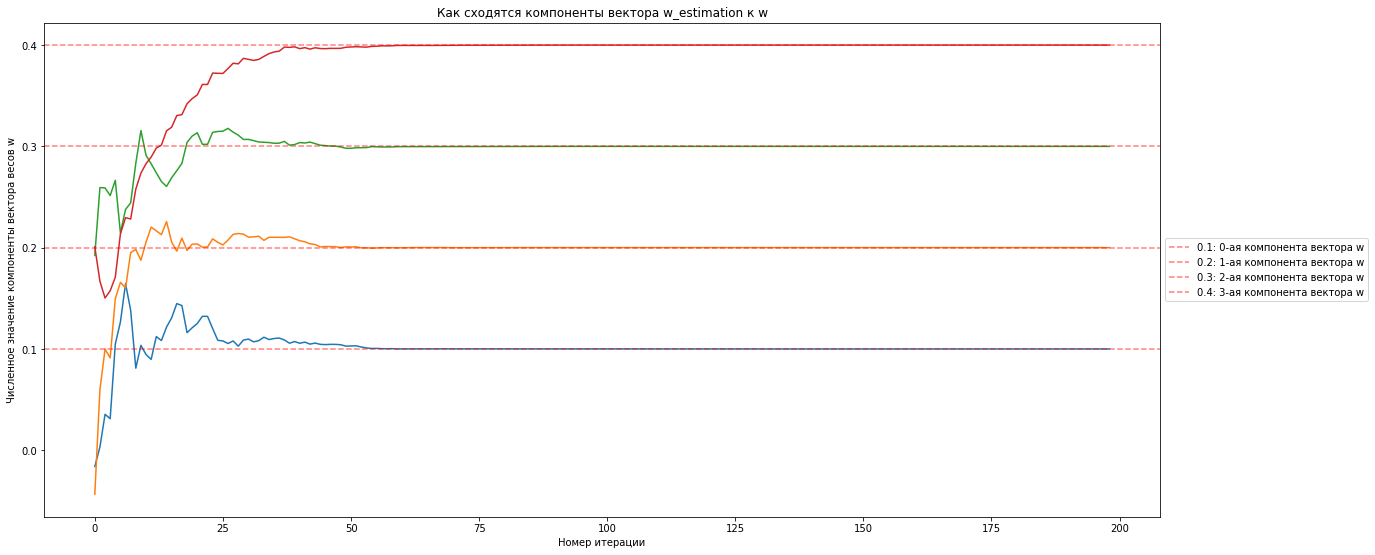

In [9]:
def plot_error_and_convergence(errors, weights):
    fig = plt.figure(figsize=(20,20))
    '''
    ax1 = fig.add_subplot(211)
    ax1.plot(errors);
    plt.xlabel('Номер итерации алгоритма Качмажа')
    plt.ylabel('Квадратичная ошибка')
    plt.title('Квадратичная ошибка: (w - w_estimation)^T * (w - w_estimation)')
    '''
    ax2 = fig.add_subplot(212)
    ax2.plot(weights.T)
    plt.title('Как сходятся компоненты вектора w_estimation к w')
    plt.xlabel('Номер итерации')
    plt.ylabel('Численное значение компоненты вектора весов w')

def plot_true_weights(weights, true_weights):
    # Указываем истинные веса на графике: компоненты вектора w 
    for index, w_component in enumerate(np.asarray(true_weights).reshape((-1))):
        plt.axhline(w_component, color='r', linestyle='--', label='{}: {}-ая компонента вектора w'.format(
            w_component, index), alpha=0.5)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
plot_error_and_convergence(errors, weights)
plot_true_weights(weights, w)

## МНК

y_with_no_error = 2.257273450644438; error = [0.]
y_with_no_error = -5.002334025717075; error = [0.]
y_with_no_error = 0.5131385240811258; error = [-0.]
y_with_no_error = 3.436296907899862; error = [0.]
y_with_no_error = 4.600602061640892; error = [-0.]
y_with_no_error = 4.181588554313394; error = [-0.]
y_with_no_error = 0.6080156466067956; error = [0.]
y_with_no_error = 2.625309969929483; error = [0.]
y_with_no_error = -0.809406317664921; error = [-0.]
y_with_no_error = 6.018528640586883; error = [-0.]
y_with_no_error = 3.778056294953554; error = [0.]
y_with_no_error = -0.40976591673475604; error = [0.]
y_with_no_error = 2.172284037596309; error = [0.]
y_with_no_error = -5.933787686274007; error = [-0.]
y_with_no_error = -3.69015213795392; error = [0.]
y_with_no_error = 0.423653959522842; error = [-0.]
y_with_no_error = -2.3048305221743637; error = [0.]
y_with_no_error = 6.099900128703795; error = [0.]
y_with_no_error = 0.08298402513362069; error = [0.]
y_with_no_error = 3.38172279835

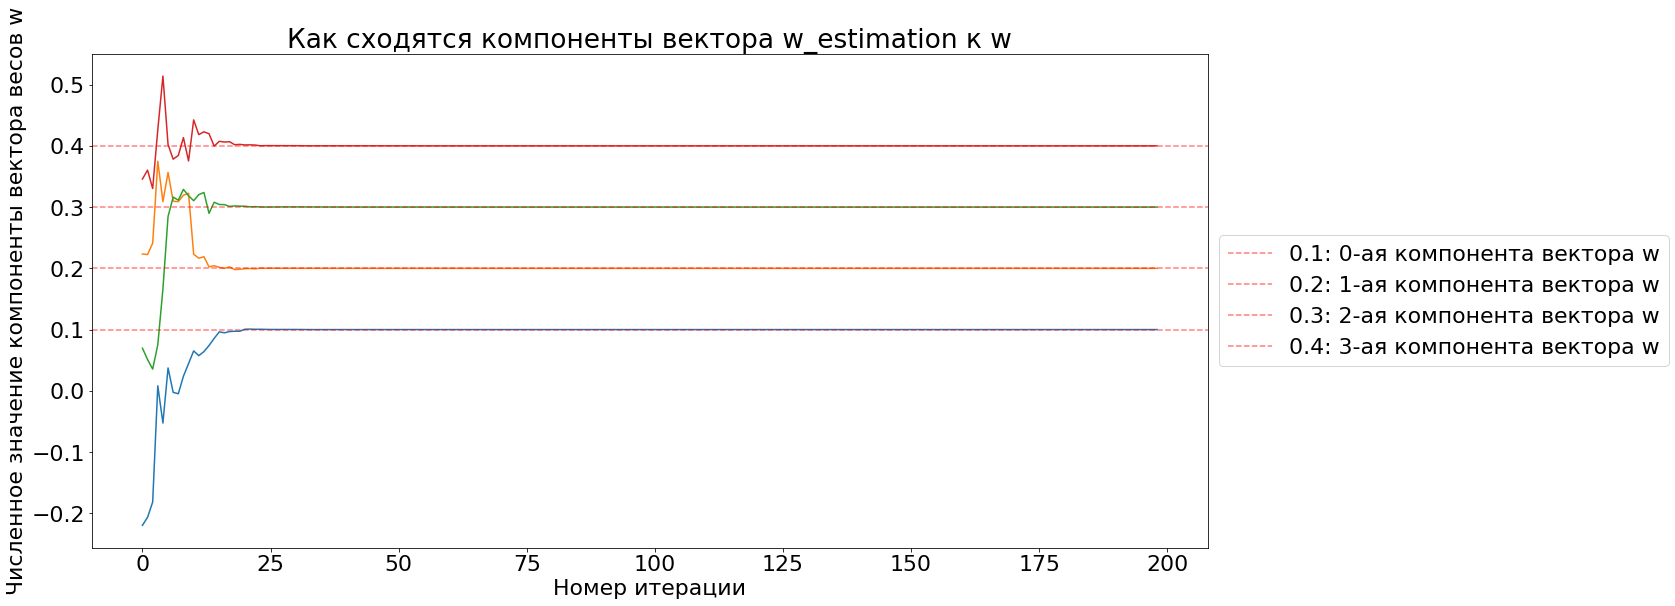

In [275]:
sigma = 0
x, y = generate_train_set(w, sigma, sample_size, num_of_features)  

gen = mnk_alg(x, y)
w_estiomation_prev_step = next(gen)

#print(w_estiomation_prev_step, w)

#squared_error_prev_step = get_squared_error(w_estiomation_prev_step, w)
#errors = squared_error_prev_step
weights = np.array([])

for iteration_num, w_estimation in enumerate(gen):
    #print(iteration_num)
    #squared_error_current_step = get_squared_error(w_estimation, w)
    
    w_estimation = w_estimation.reshape((-1,1))
    #print(w_estimation, w_estimation.shape, weights.shape)
    if weights.size == 0:
        weights = w_estimation
    else:
        weights = np.hstack((weights, w_estimation))
    #errors = np.append(errors, squared_error_current_step)
plot_error_and_convergence(0, weights)
plot_true_weights(weights, w)

# C шумом
теперь ищем веса w для модели y = x * w + epsilon,
где epsilon - случайная ошибка(она накладывается в момент генерации обучающей выборки
и регулируется параметром sigma)

In [277]:
sigma = 0.2

In [11]:
x, y = generate_train_set(w, sigma, sample_size, num_of_features)  

gen = kaczmarz_alg(x, y, gamma=0.6)
w_estiomation_prev_step = next(gen)


squared_error_prev_step = get_squared_error(w_estiomation_prev_step, w)
errors = squared_error_prev_step
weights = np.array([])

for iteration_num, w_estimation in enumerate(gen):
    print(iteration_num)
    squared_error_current_step = get_squared_error(w_estimation, w)

    w_estimation = w_estimation.reshape((-1,1))
    print(w_estimation, w_estimation.shape, weights.shape)
    if weights.size == 0:
        weights = w_estimation
    else:
        weights = np.hstack((weights, w_estimation))
    errors = np.append(errors, squared_error_current_step)

y_with_no_error = -3.136711373801594; error = [-0.06646753]
y_with_no_error = 4.9479017785690615; error = [-0.00923907]
y_with_no_error = 3.9784153691500013; error = [0.01164511]
y_with_no_error = -3.189110038628848; error = [-0.09094827]
y_with_no_error = -5.091496084688239; error = [0.0659067]
y_with_no_error = -4.031203026792401; error = [-0.07169297]
y_with_no_error = -7.407502897664387; error = [-0.08262387]
y_with_no_error = -4.893559271885909; error = [-0.02852409]
y_with_no_error = 3.804255749148476; error = [-0.02468777]
y_with_no_error = 5.289527572817071; error = [0.0218384]
y_with_no_error = -0.2782301646042801; error = [-0.0002288]
y_with_no_error = -2.374614560204383; error = [0.02525473]
y_with_no_error = -0.4676413087195561; error = [-0.02809451]
y_with_no_error = 1.0398339455052603; error = [-0.01011614]
y_with_no_error = -0.4502352137862523; error = [0.06836379]
y_with_no_error = -4.769100872814974; error = [-0.09399248]
y_with_no_error = -5.952969734444998; error = [

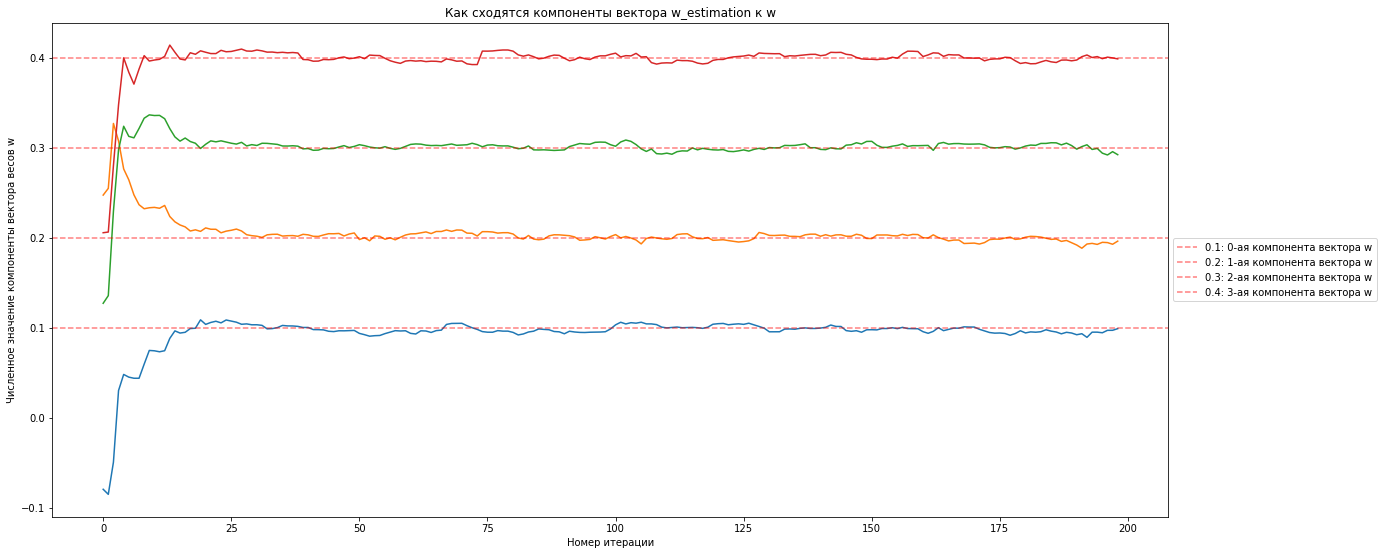

In [12]:
plot_error_and_convergence(errors, weights)
plot_true_weights(weights, w)

## МНК

y_with_no_error = -4.103910368289283; error = [0.07097218]
y_with_no_error = 0.709170971979205; error = [0.03595443]
y_with_no_error = 4.251347503974931; error = [-0.09146493]
y_with_no_error = -1.021896338068457; error = [0.09285382]
y_with_no_error = -6.276098730146884; error = [-0.01385803]
y_with_no_error = 2.5866289337885653; error = [0.05575593]
y_with_no_error = 4.106237264943063; error = [0.00664555]
y_with_no_error = -0.35075107205035305; error = [-0.09070278]
y_with_no_error = -2.029729353409213; error = [0.06065494]
y_with_no_error = -3.3363378067831952; error = [-0.02435983]
y_with_no_error = 2.7886278054394604; error = [0.09898665]
y_with_no_error = 1.7637691367378272; error = [0.00342992]
y_with_no_error = 0.38211366538210667; error = [-0.05663819]
y_with_no_error = -0.06751724722273644; error = [-0.0932436]
y_with_no_error = -1.8011116581684625; error = [-0.09693362]
y_with_no_error = -1.8141252277994637; error = [-0.07306474]
y_with_no_error = 1.186530812325633; error =

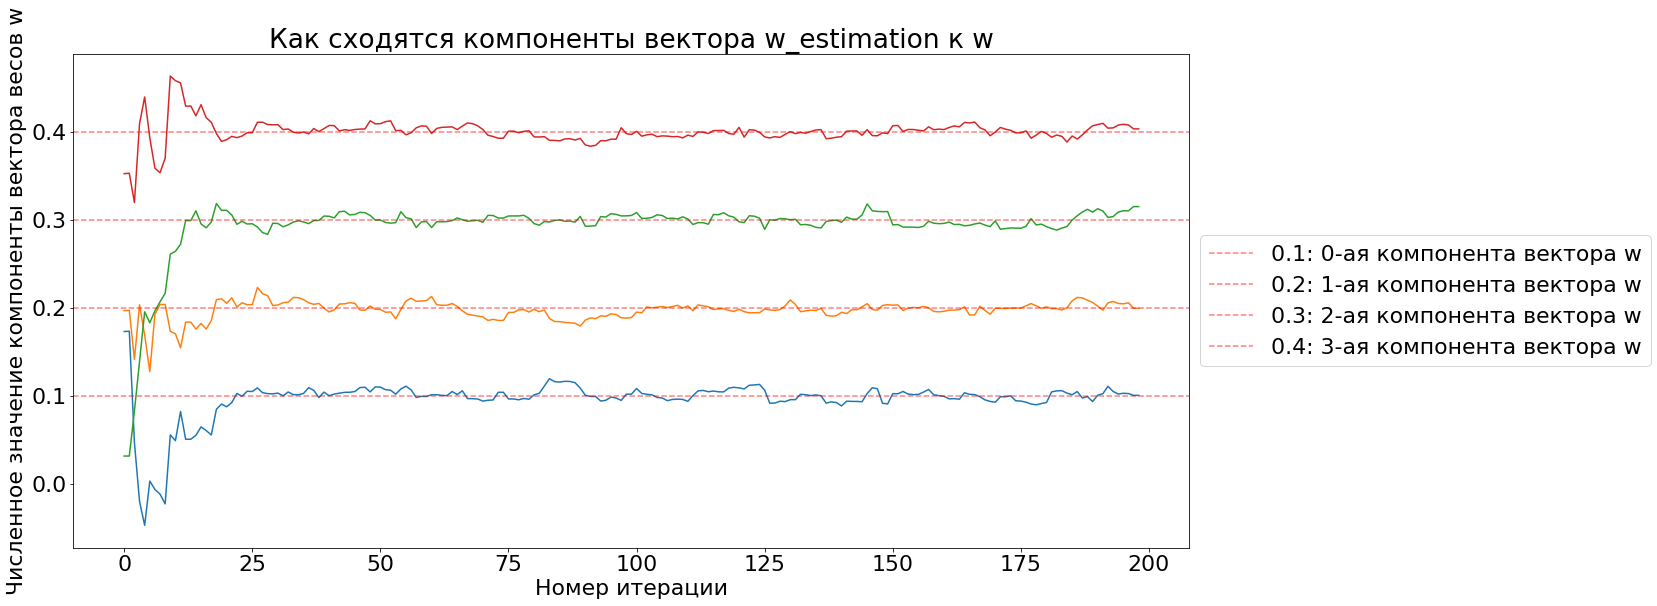

In [278]:
x, y = generate_train_set(w, sigma, sample_size, num_of_features)  

gen = mnk_alg(x, y)
w_estiomation_prev_step = next(gen)

#print(w_estiomation_prev_step, w)

#squared_error_prev_step = get_squared_error(w_estiomation_prev_step, w)
#errors = squared_error_prev_step
weights = np.array([])

for iteration_num, w_estimation in enumerate(gen):
    #print(iteration_num)
    #squared_error_current_step = get_squared_error(w_estimation, w)
    
    w_estimation = w_estimation.reshape((-1,1))
    #print(w_estimation, w_estimation.shape, weights.shape)
    if weights.size == 0:
        weights = w_estimation
    else:
        weights = np.hstack((weights, w_estimation))
    #errors = np.append(errors, squared_error_current_step)
plot_error_and_convergence(0, weights)
plot_true_weights(weights, w)

# Теперь веса w будут линейно изменяться во времени

In [279]:
sample_size = 200  # размер выборки
num_of_features = 4 # кол-во признаков - кол-во столбцов в матр. x и размер вектора w

# веса меняются через равные промежутки, на одинаковое кол-во для каждого примера в выборке
w = np.linspace(-0.4, 0.4, sample_size)


sigma = 0.2

### генерация выборки

In [280]:
x = np.linspace(-10, 10, sample_size).reshape((-1,1))
y = np.array([])

for w_example, _x in zip(w, x):
    w_example = np.asarray(w_example).reshape((-1,))
    y = np.append(y, w_example * _x)

y = y.reshape((-1,1))

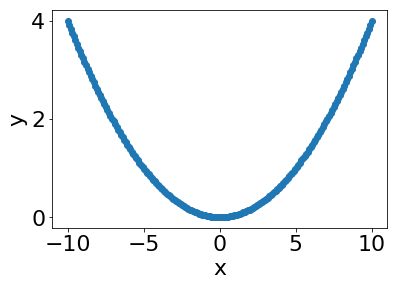

In [281]:
plt.scatter(x, y);
plt.xlabel('x');
plt.ylabel('y');

In [283]:
gen = kaczmarz_alg(x, y, gamma=0.6)
w_estiomation_prev_step = next(gen)

squared_error_prev_step = get_squared_error(w_estiomation_prev_step, np.asarray(w[0]).reshape((-1,1)))
errors = squared_error_prev_step
weights = np.array([])

for iteration_num, w_estimation in enumerate(gen):
    print(iteration_num)
    w_example = np.asarray(w[iteration_num]).reshape((-1,1))
    print('w...',w_example)
    squared_error_current_step = get_squared_error(w_estimation, w_example)

    w_estimation = w_estimation.reshape((-1,1))
    print(w_estimation, w_estimation.shape, weights.shape)
    if weights.size == 0:
        weights = w_estimation
    else:
        weights = np.hstack((weights, w_estimation))
    errors = np.append(errors, squared_error_current_step)

[-10.] [4.]
[-9.89949749] [3.92000202]
0
w... [[-0.4]]
[[-0.33358794]] (1, 1) (0,)
[-9.79899497] [3.8408121]
1
w... [[-0.3959799]]
[[-0.36861106]] (1, 1) (1, 1)
[-9.69849246] [3.76243024]
2
w... [[-0.3919598]]
[[-0.38020824]] (1, 1) (1, 2)
[-9.59798995] [3.68485644]
3
w... [[-0.3879397]]
[[-0.38243506]] (1, 1) (1, 3)
[-9.49748744] [3.6080907]
4
w... [[-0.3839196]]
[[-0.38091372]] (1, 1) (1, 4)
[-9.39698492] [3.53213303]
5
w... [[-0.3798995]]
[[-0.37789313]] (1, 1) (1, 5)
[-9.29648241] [3.45698341]
6
w... [[-0.3758794]]
[[-0.37427283]] (1, 1) (1, 6)
[-9.1959799] [3.38264185]
7
w... [[-0.3718593]]
[[-0.37041265]] (1, 1) (1, 7)
[-9.09547739] [3.30910836]
8
w... [[-0.3678392]]
[[-0.36645652]] (1, 1) (1, 8)
[-8.99497487] [3.23638292]
9
w... [[-0.3638191]]
[[-0.362462]] (1, 1) (1, 9)
[-8.89447236] [3.16446554]
10
w... [[-0.35979899]]
[[-0.35845214]] (1, 1) (1, 10)
[-8.79396985] [3.09335623]
11
w... [[-0.35577889]]
[[-0.35443613]] (1, 1) (1, 11)
[-8.69346734] [3.02305497]
12
w... [[-0.3517587

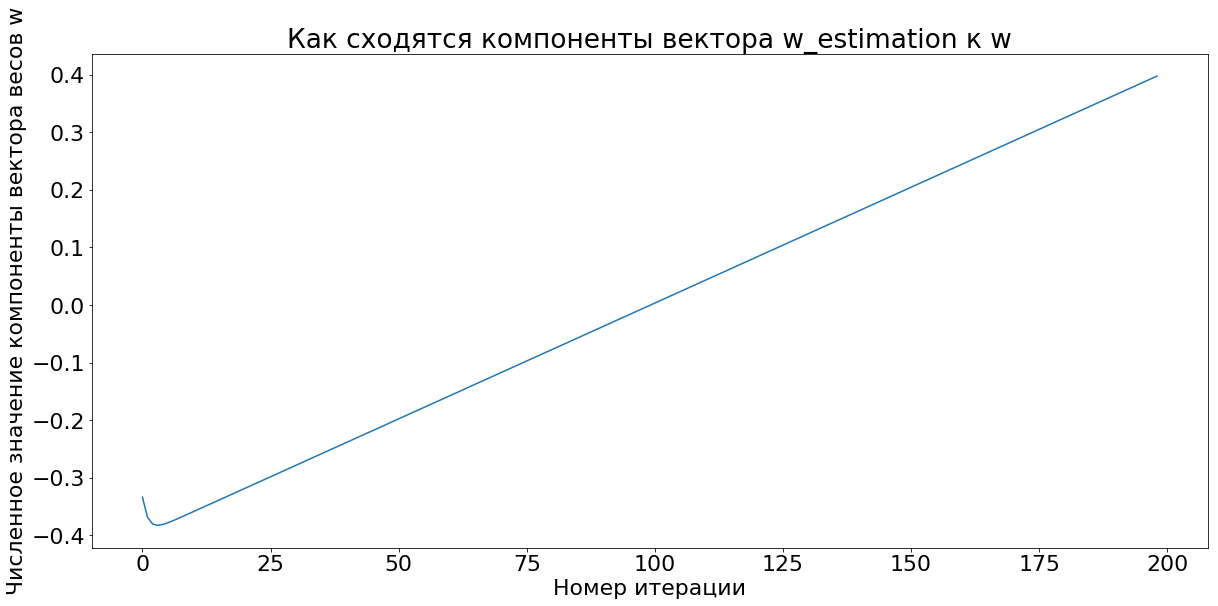

In [284]:
plot_error_and_convergence(errors, weights)

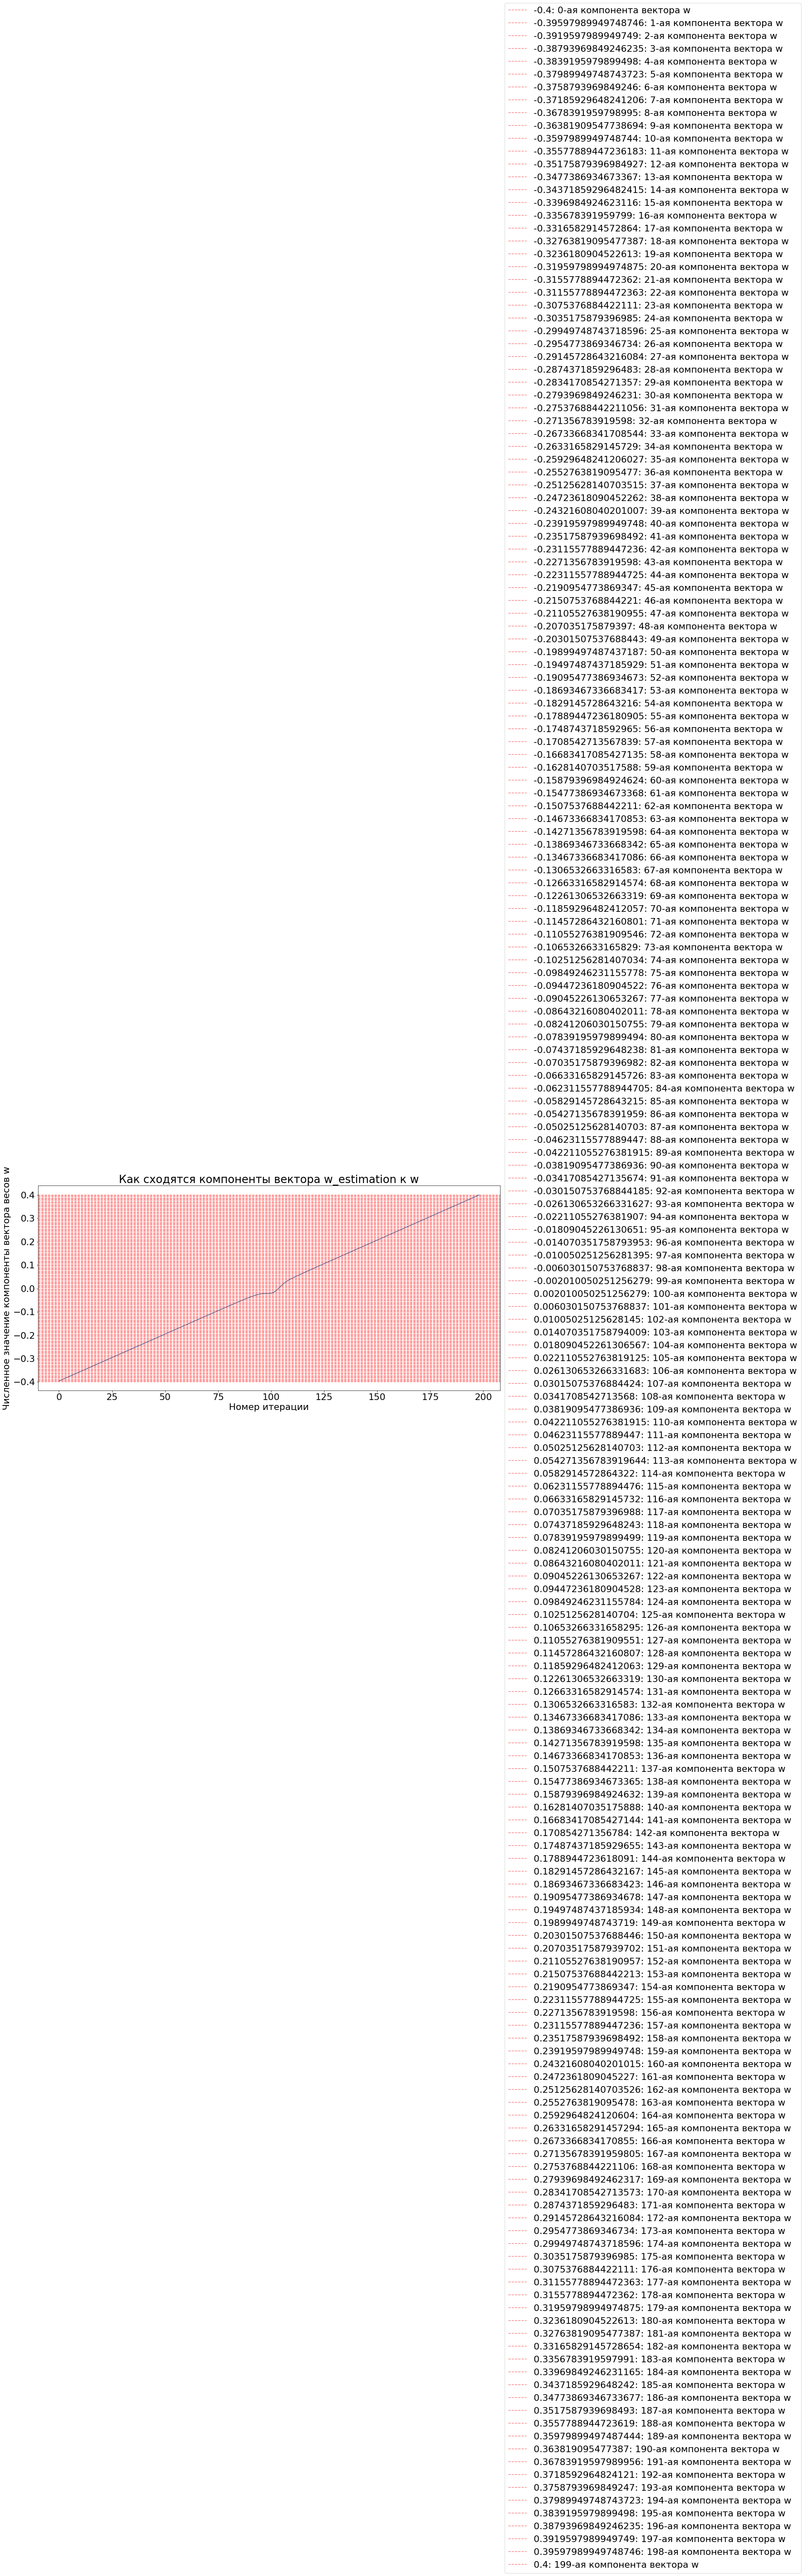

In [285]:
#x, y = generate_train_set(w, sigma, sample_size, num_of_features)  

gen = mnk_alg(x, y, 0.6)
w_estiomation_prev_step = next(gen)

#print(w_estiomation_prev_step, w)

#squared_error_prev_step = get_squared_error(w_estiomation_prev_step, w)
#errors = squared_error_prev_step
weights = np.array([])

for iteration_num, w_estimation in enumerate(gen):
    #print(iteration_num)
    #squared_error_current_step = get_squared_error(w_estimation, w)
    
    w_estimation = w_estimation.reshape((-1,1))
    #print(w_estimation, w_estimation.shape, weights.shape)
    if weights.size == 0:
        weights = w_estimation
    else:
        weights = np.hstack((weights, w_estimation))
    #errors = np.append(errors, squared_error_current_step)
plot_error_and_convergence(0, weights)
plot_true_weights(weights, w)